In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
cancer = load_breast_cancer()

In [2]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

C:\Users\Hp\AppData\Local\Temp\ipykernel_8396\1249934815.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


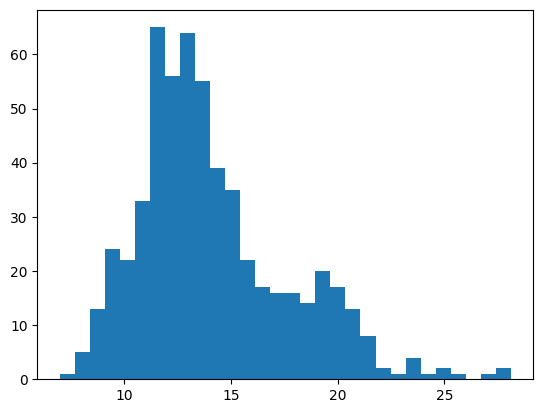

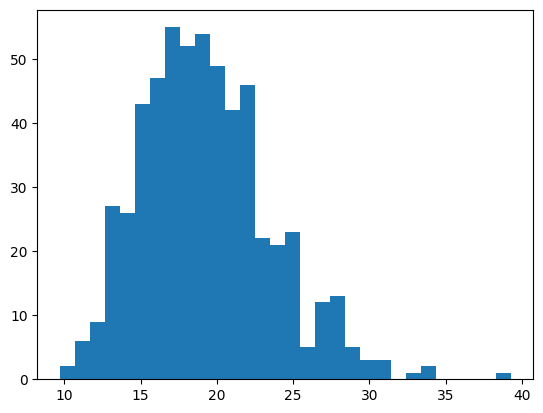

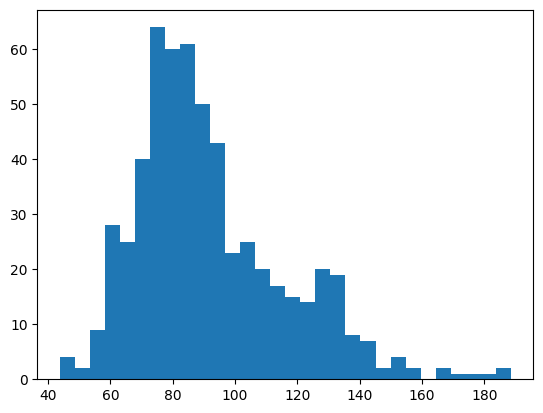

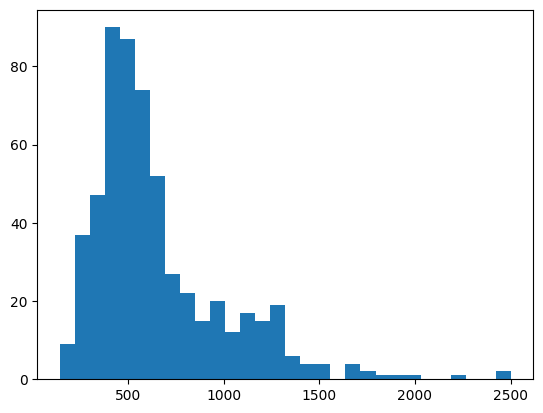

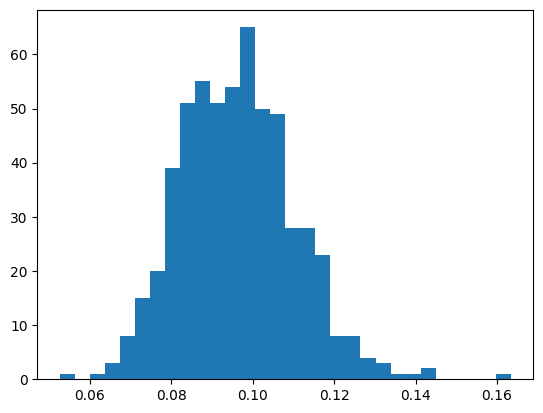

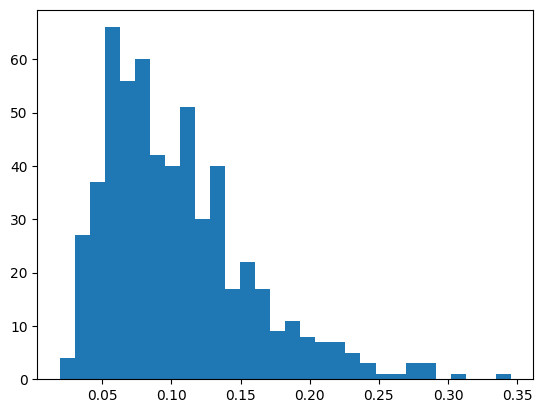

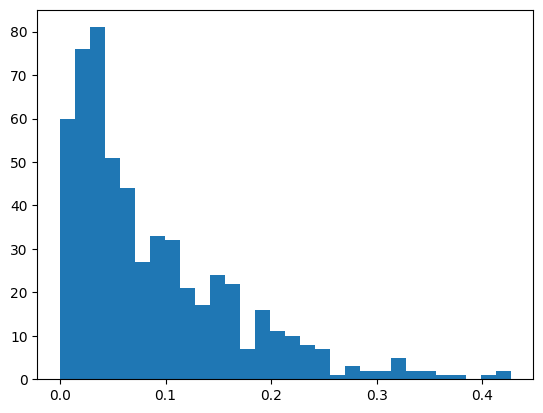

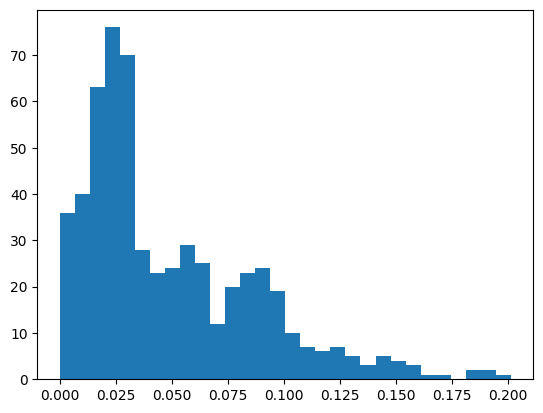

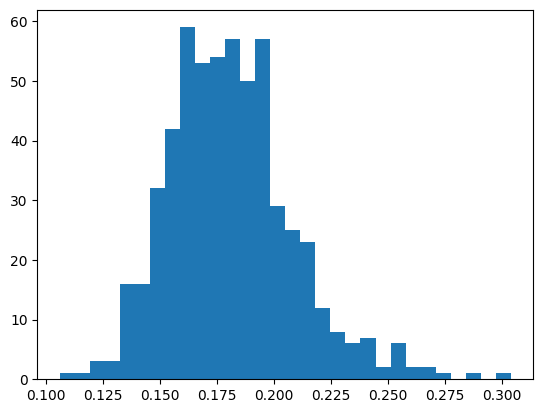

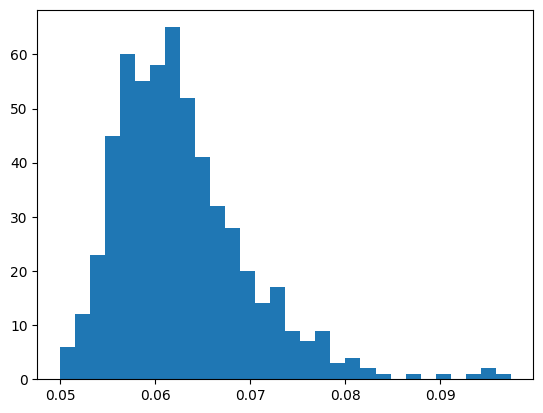

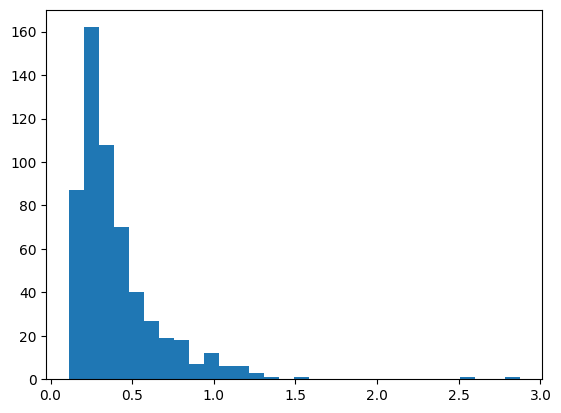

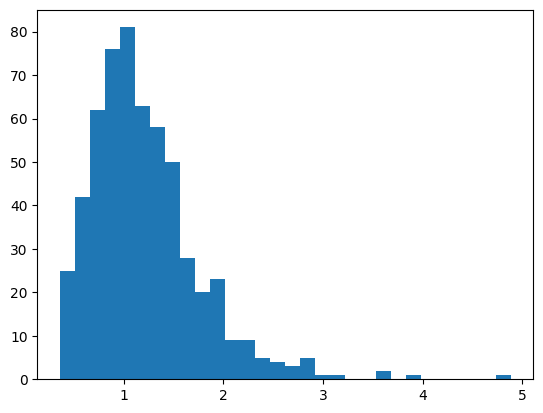

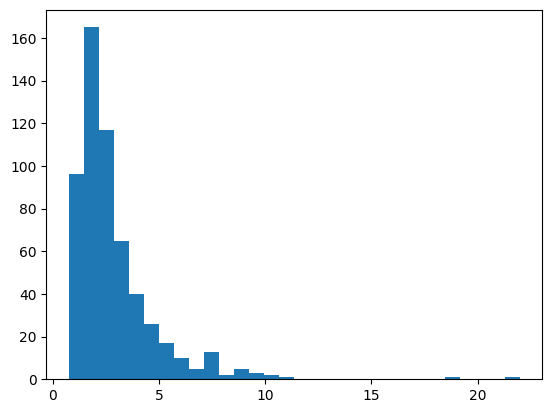

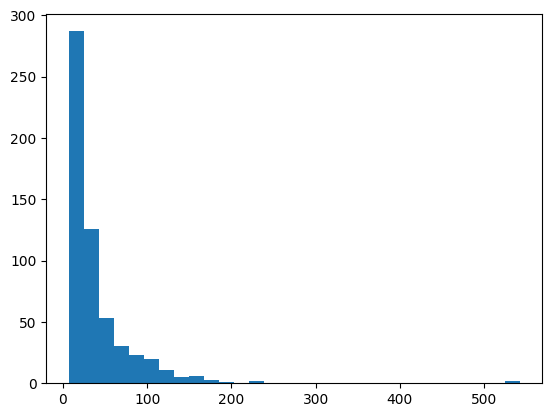

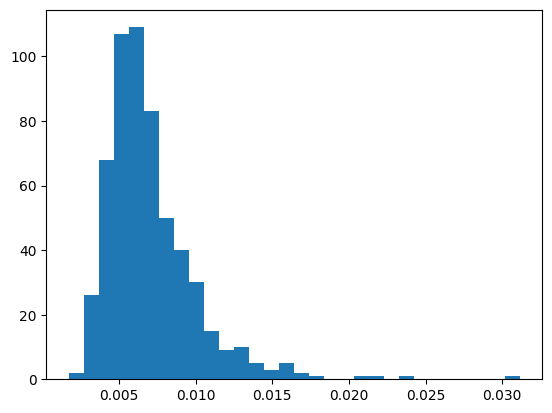

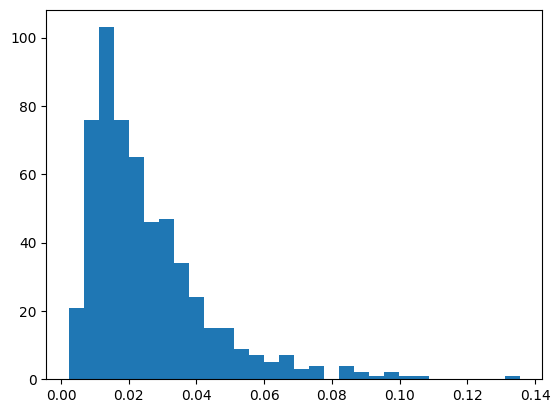

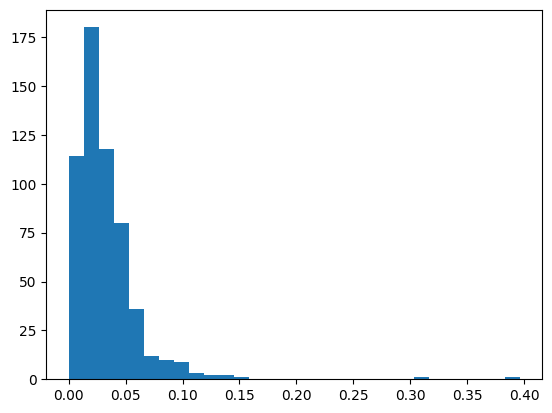

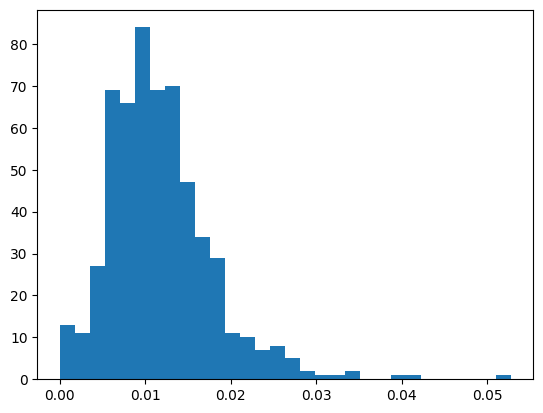

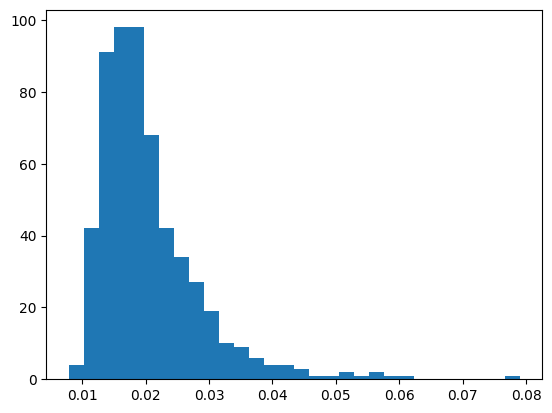

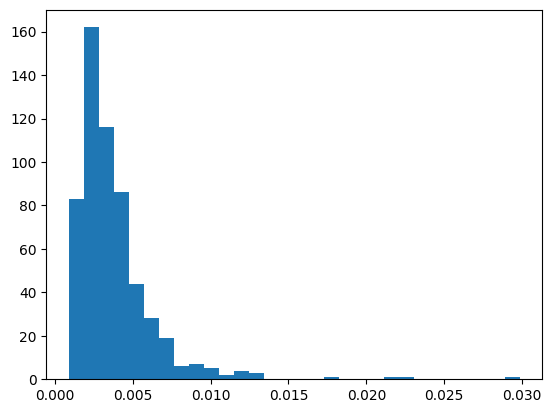

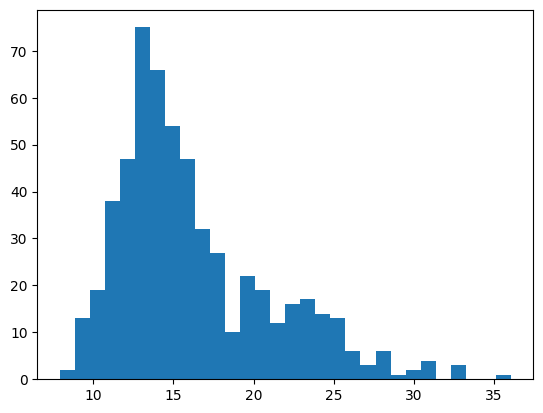

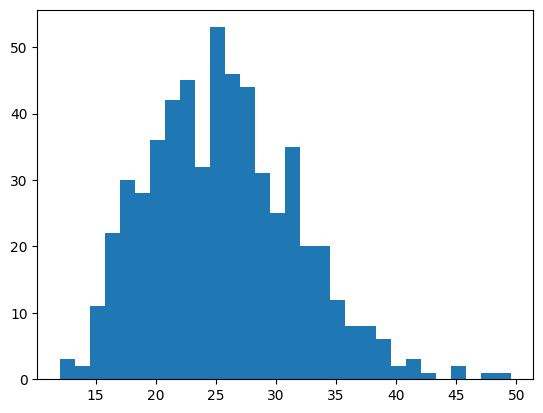

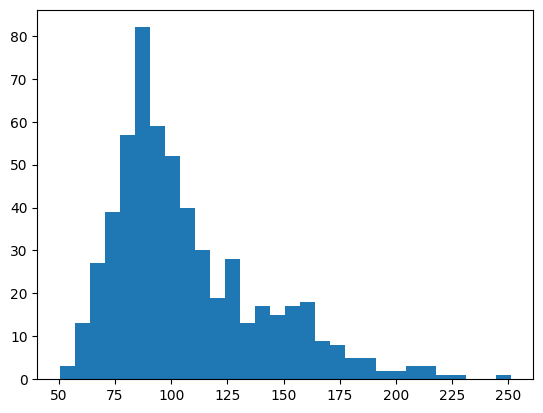

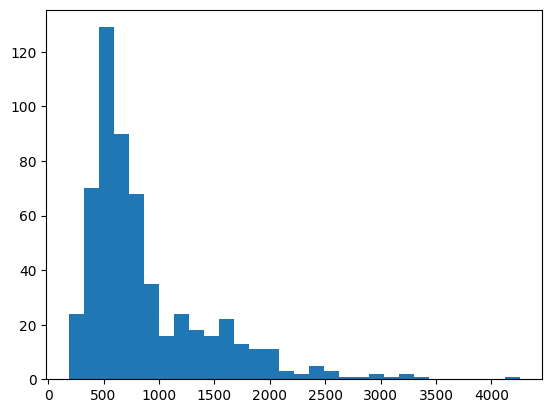

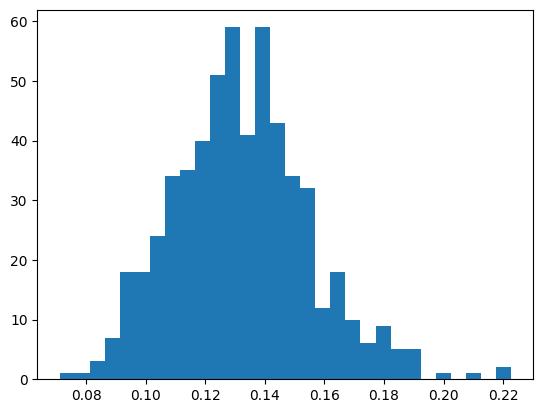

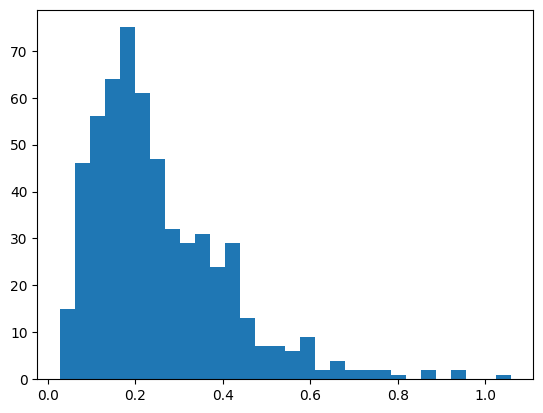

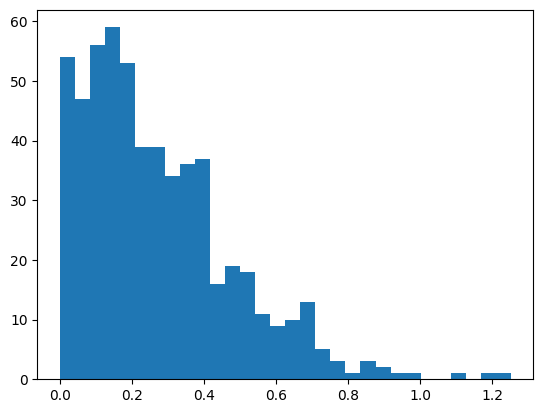

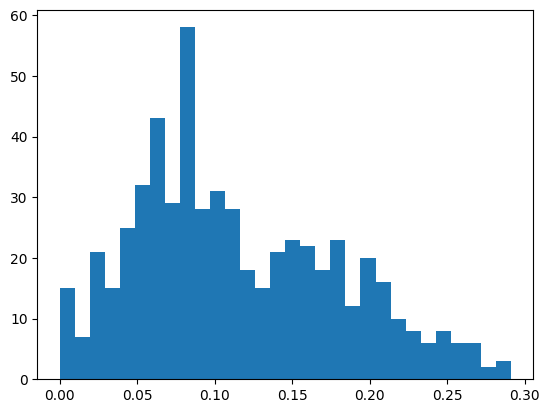

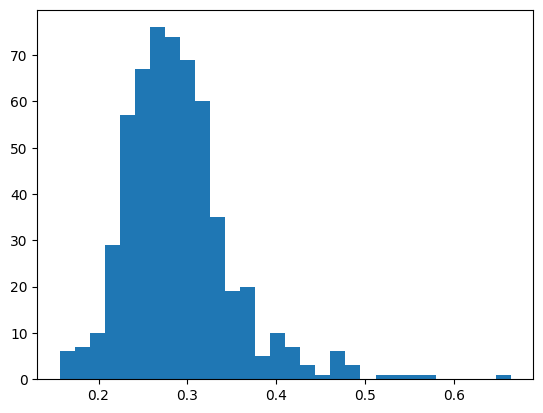

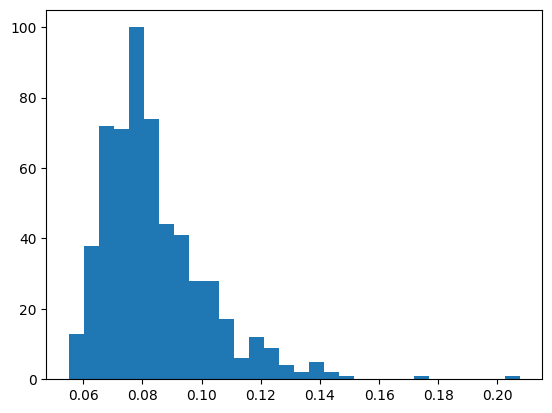

In [6]:
for i in range(30):
    plt.figure()
    plt.hist(cancer.data[:,i],30)

In [7]:
#standardize
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(cancer.data)

from sklearn.preprocessing import MinMaxScaler
data01=MinMaxScaler().fit_transform(cancer.data)

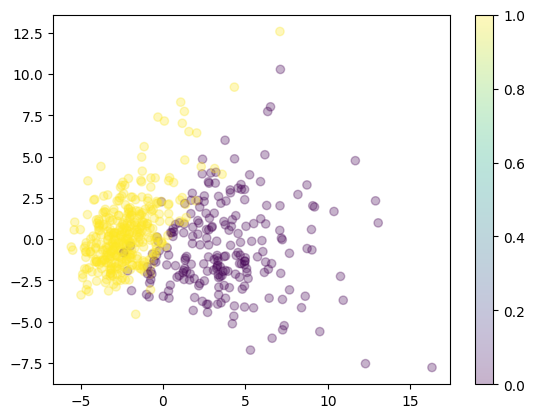

In [8]:
from sklearn.decomposition import PCA
# z=PCA(n_components=2,whiten=False).fit_transform(cancer.data)
z=PCA(n_components=2,whiten=False).fit_transform(standardized_data)
# z=PCA(n_components=2,whiten=False).fit_transform(data01)
# z
plt.scatter(z[:,0],z[:,1],c=cancer.target,alpha=0.3)
plt.colorbar()

In [15]:
import numpy as np
np.unique(cancer.target)

array([0, 1])

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

scaler = MinMaxScaler()
data_scaled01 = scaler.fit_transform(cancer.data)

In [18]:
df = pd.DataFrame(data_scaled, columns=cancer.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), cancer.target, 
                                                    stratify=cancer.target, random_state=66)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KNeighborsClassifier=KNeighborsClassifier()

In [33]:
n_neighbors=[int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
parameters = dict(n_neighbors = n_neighbors)
parameters

{'n_neighbors': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}

In [34]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(KNeighborsClassifier, parameters)
clf.fit(X_train,y_train)
print('score : ' , clf.best_score_)
print('params : ' , clf.best_params_)


score :  0.9507250341997265
params :  {'n_neighbors': 1}


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  F

In [35]:
y_pred = clf.best_estimator_.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.951048951048951

In [38]:
x.shape

(569,)

In [39]:
from sklearn.feature_selection import SelectKBest,f_classif
k_best=SelectKBest(score_func=f_classif,k=2)

X_new=k_best.fit_transform(df.to_numpy(),cancer.target)
selected_indices=k_best.get_support(indices=True)
selected_features= df.columns[selected_indices]
selected_features

Index(['worst perimeter', 'worst concave points'], dtype='object')

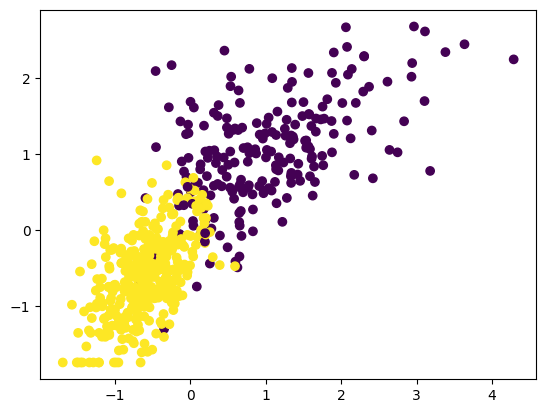

In [41]:
plt.scatter(df['worst perimeter'],df['worst concave points'],c=cancer.target)#plot the most two important features

In [71]:
df1 =pd.DataFrame(df)
a=cancer.target
df2=pd.DataFrame(df2)
df2
df2.rename(columns = {0 : "target"}, inplace = True)

In [70]:
df2.dtypes

target    int32
dtype: object

In [75]:
df2['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [72]:
df = pd.concat([df1, df2], axis=1)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0


In [73]:
correlation=df.corr()['target']
correlation

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [74]:
sorted_features=correlation.abs().sort_values(ascending=False)
sorted_features

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [69]:
df.drop("target",axis=1,inplace=True)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#removing outlier (noise in data)
import scipy.stats as stats
import numpy as np
z_scores = np.abs(stats.zscore(df))
threshold =3
print("size before removing outliers:",df.shape)
outliers_df = df[(z_scores > threshold).any(axis=1)]
df=df[(z_scores <= threshold).all(axis=1)]
print("size before removing outliers:",df.shape)

NameError: name 'df' is not defined